<a href="https://colab.research.google.com/github/NervOUs11/Predict_CocaCola_Stock/blob/main/Predict_KO_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# For use DataReader in pandas
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
# Import libraries
import math
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from keras.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
#Get the stock quote
start = '2012-01-01'
end = '2022-06-25'
df = pdr.DataReader('KO', data_source='yahoo', start=start,end=end)
# show 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,35.355000,35.049999,35.075001,35.070000,15639600.0,25.261477
2012-01-04,35.035000,34.750000,34.955002,34.849998,14239200.0,25.103010
2012-01-05,34.935001,34.674999,34.880001,34.685001,14287600.0,24.984154
2012-01-06,34.814999,34.310001,34.735001,34.465000,13646600.0,24.825682
2012-01-09,34.584999,34.400002,34.500000,34.465000,10522600.0,24.825682
...,...,...,...,...,...,...
2022-06-17,60.130001,59.130001,59.700001,59.430000,34731500.0,59.430000
2022-06-21,60.880001,59.009998,59.490002,60.700001,17705000.0,60.700001
2022-06-22,61.450001,60.320000,60.599998,61.150002,15207100.0,61.150002


In [5]:
# Show price from last 7 days
df.tail(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-15,60.639999,58.970001,60.000000,59.669998,19684700.0,59.669998
2022-06-16,59.520000,58.250000,58.639999,59.070000,15053800.0,59.070000
2022-06-17,60.130001,59.130001,59.700001,59.430000,34731500.0,59.430000
2022-06-21,60.880001,59.009998,59.490002,60.700001,17705000.0,60.700001
2022-06-22,61.450001,60.320000,60.599998,61.150002,15207100.0,61.150002
2022-06-23,61.910000,61.230000,61.299999,61.880001,17190900.0,61.880001
2022-06-24,63.060001,62.110001,62.110001,63.040001,18145700.0,63.040001


In [6]:
# Get the number of rows and columns in the data set
df.shape

(2637, 6)

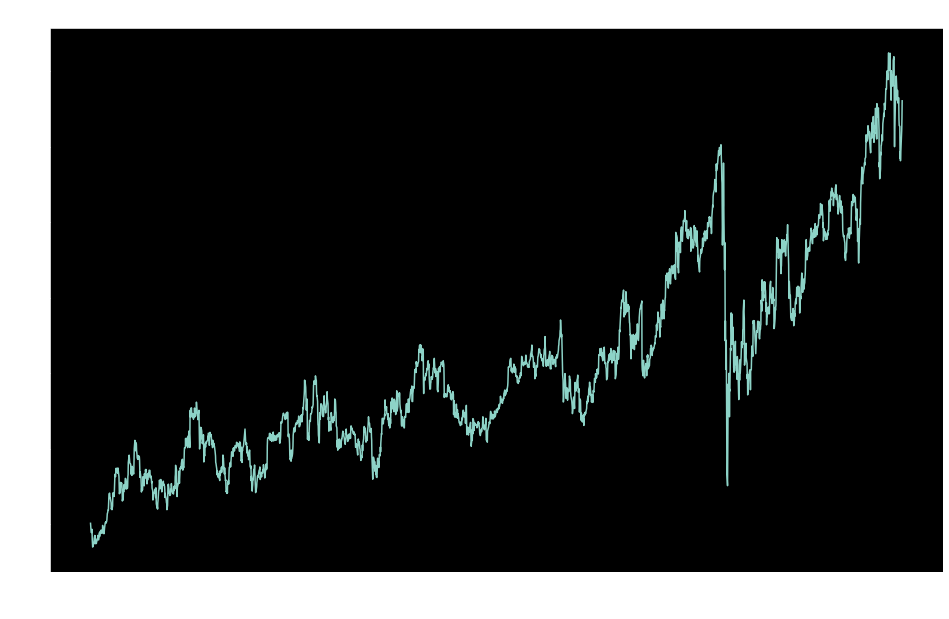

In [7]:
#Visualize the closing price
plt.figure(figsize=(16,10))
plt.style.use('dark_background')
plt.title('Close price history',fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price ($)',fontsize=20)
plt.show()

In [8]:
#Create a new dataframe with only the "Close" column
data = df.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2110

In [9]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04814308],
       [0.0414183 ],
       [0.03637483],
       ...,
       [0.84533096],
       [0.86764487],
       [0.90310261]])

In [10]:
#Create the training date set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()
 

[array([0.04814308, 0.0414183 , 0.03637483, 0.02965004, 0.02965004,
       0.03591622, 0.01635335, 0.00886446, 0.        , 0.00550207,
       0.00917008, 0.0070304 , 0.01681184, 0.02353662, 0.01390805,
       0.02200829, 0.01558924, 0.00687765, 0.00718327, 0.00825311,
       0.01314383, 0.01283821, 0.01665909, 0.01589486, 0.02384235,
       0.02047996, 0.01497789, 0.0145194 , 0.02216116, 0.02919156,
       0.0215498 , 0.0285802 , 0.03148411, 0.02796885, 0.03454076,
       0.03347092, 0.03071989, 0.02812172, 0.02842734, 0.04386371,
       0.03988997, 0.03347092, 0.03423514, 0.02705188, 0.02751036,
       0.03484638, 0.03851451, 0.04829594, 0.04982427, 0.04936579,
       0.05104698, 0.04844881, 0.05211682, 0.05502061, 0.06312097,
       0.06770595, 0.06877579, 0.07504209, 0.0745836 , 0.08665758])]
[0.10423352686863319]

[array([0.04814308, 0.0414183 , 0.03637483, 0.02965004, 0.02965004,
       0.03591622, 0.01635335, 0.00886446, 0.        , 0.00550207,
       0.00917008, 0.0070304 , 0.01

In [11]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train.shape

(2050, 60)

In [13]:
#Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2050, 60, 1)

In [25]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2050/2050 [==============================] - 67s 30ms/step - loss: 0.0021
Epoch 2/5
2050/2050 [==============================] - 59s 29ms/step - loss: 7.7021e-04
Epoch 3/5
2050/2050 [==============================] - 59s 29ms/step - loss: 5.6271e-04
Epoch 4/5
2050/2050 [==============================] - 61s 30ms/step - loss: 4.6532e-04
Epoch 5/5
2050/2050 [==============================] - 60s 29ms/step - loss: 4.1975e-04


In [26]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [27]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [28]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
#Model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [30]:
#Get the root mean squared Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.017397401002598

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


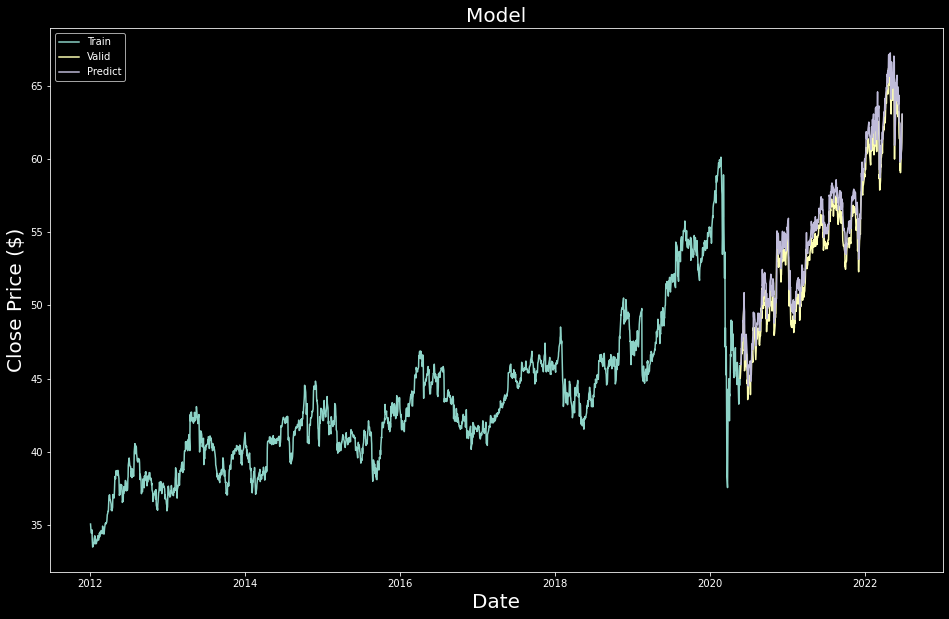

In [36]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,10))
plt.style.use('dark_background')
plt.title('Model',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price ($)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predict'])
plt.show()

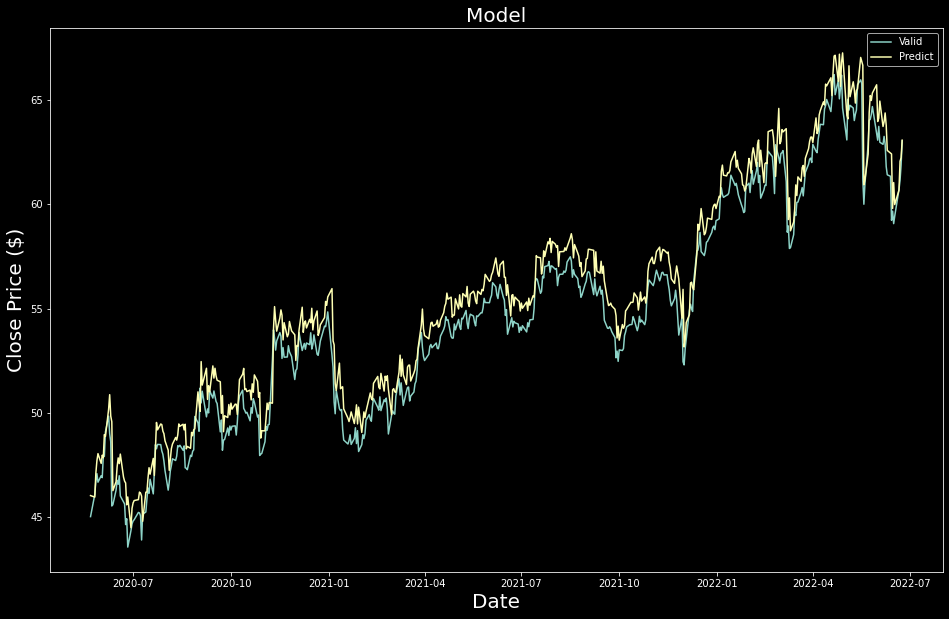

In [32]:
plt.figure(figsize=(16,10))
plt.style.use('dark_background')
plt.title('Model',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price ($)',fontsize=20)
plt.plot(valid[['Close','Predictions']])
plt.legend(['Valid','Predict'])
plt.show()

In [33]:
#Show the valid and predict prices
valid

,Close,Predictions
Date,,
2020-05-22,45.029999,46.038116
2020-05-26,46.090000,45.965401
2020-05-27,46.730000,47.107014
2020-05-28,47.090000,47.709099
2020-05-29,46.680000,48.048817
...,...,...
2022-06-17,59.430000,59.983608
2022-06-21,60.700001,60.676682
2022-06-22,61.150002,62.057804


In [34]:
#Get the quote
KO_quote = pdr.DataReader('KO', data_source='yahoo', start=start,end=end)
#Create a new dataframe
new_df = KO_quote.filter(['Close'])
#Get last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test = []
#Append past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#Get the predicted scaled price 
predicted_price = model.predict(x_test)
#Undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print("Predicted price is",predicted_price)

Predicted price is [[64.28993]]


In [35]:
KO_quote2 = pdr.DataReader('KO', data_source='yahoo', start=end,end=end)
print(KO_quote2['Close'])

Date
2022-06-24    63.040001
Name: Close, dtype: float64
